<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,98.708216,-0.041839,108.666376,108.699816,-0.033440
1,0.0,1.0,89.702708,-0.035999,99.666709,99.695849,-0.029141
2,0.0,2.0,49.750226,0.026078,59.776304,59.750202,0.026102
3,0.0,3.0,48.858164,-0.206870,58.651294,58.858292,-0.206998
4,0.0,4.0,87.303516,0.004120,97.307637,97.297068,0.010569
...,...,...,...,...,...,...,...
119995,999.0,115.0,42.798547,0.115676,52.914223,52.808475,0.105747
119996,999.0,116.0,26.248939,0.035876,36.284816,36.263154,0.021662
119997,999.0,117.0,89.409618,0.060377,99.469995,99.407475,0.062520
119998,999.0,118.0,85.767631,-0.070611,95.697020,95.766431,-0.069411


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,98.708216,-0.041839,108.666376,108.699816,-0.033440
1,0.0,1.0,89.702708,-0.035999,99.666709,99.695849,-0.029141
2,0.0,2.0,49.750226,0.026078,59.776304,59.750202,0.026102
3,0.0,3.0,48.858164,-0.206870,58.651294,58.858292,-0.206998
4,0.0,4.0,87.303516,0.004120,97.307637,97.297068,0.010569
...,...,...,...,...,...,...,...
119995,999.0,115.0,42.798547,0.115676,52.914223,52.808475,0.105747
119996,999.0,116.0,26.248939,0.035876,36.284816,36.263154,0.021662
119997,999.0,117.0,89.409618,0.060377,99.469995,99.407475,0.062520
119998,999.0,118.0,85.767631,-0.070611,95.697020,95.766431,-0.069411


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    98.708216 -0.041839  108.666376  108.699816 -0.033440
      1.0    89.702708 -0.035999   99.666709   99.695849 -0.029141
      2.0    49.750226  0.026078   59.776304   59.750202  0.026102
      3.0    48.858164 -0.206870   58.651294   58.858292 -0.206998
      4.0    87.303516  0.004120   97.307637   97.297068  0.010569
...                ...       ...         ...         ...       ...
999.0 115.0  42.798547  0.115676   52.914223   52.808475  0.105747
      116.0  26.248939  0.035876   36.284816   36.263154  0.021662
      117.0  89.409618  0.060377   99.469995   99.407475  0.062520
      118.0  85.767631 -0.070611   95.697020   95.766431 -0.069411
      119.0  74.111032  0.052308   84.163340   84.112852  0.050489

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    98.708216 -0.041839  108.666376  108.699816 -0.033440
      1.0    89.702708 -0.035999   99.666709   99.695849 -0.029141
      2.0    49.750226  0.026078   59.776304   59.750202  0.026102
      3.0    48.858164 -0.206870   58.651294   58.858292 -0.206998
      4.0    87.303516  0.004120   97.307637   97.297068  0.010569
...                ...       ...         ...         ...       ...
999.0 115.0  42.798547  0.115676   52.914223   52.808475  0.105747
      116.0  26.248939  0.035876   36.284816   36.263154  0.021662
      117.0  89.409618  0.060377   99.469995   99.407475  0.062520
      118.0  85.767631 -0.070611   95.697020   95.766431 -0.069411
      119.0  74.111032  0.052308   84.163340   84.112852  0.050489

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,98.708216,-0.041839,108.666376,108.699816,-0.033440
1,0.0,1.0,89.702708,-0.035999,99.666709,99.695849,-0.029141
2,0.0,2.0,49.750226,0.026078,59.776304,59.750202,0.026102
3,0.0,3.0,48.858164,-0.206870,58.651294,58.858292,-0.206998
4,0.0,4.0,87.303516,0.004120,97.307637,97.297068,0.010569
...,...,...,...,...,...,...,...
119995,999.0,115.0,42.798547,0.115676,52.914223,52.808475,0.105747
119996,999.0,116.0,26.248939,0.035876,36.284816,36.263154,0.021662
119997,999.0,117.0,89.409618,0.060377,99.469995,99.407475,0.062520
119998,999.0,118.0,85.767631,-0.070611,95.697020,95.766431,-0.069411


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    98.708216 -0.041839  108.666376  108.699816 -0.033440
      1.0    89.702708 -0.035999   99.666709   99.695849 -0.029141
      2.0    49.750226  0.026078   59.776304   59.750202  0.026102
      3.0    48.858164 -0.206870   58.651294   58.858292 -0.206998
      4.0    87.303516  0.004120   97.307637   97.297068  0.010569
...                ...       ...         ...         ...       ...
999.0 115.0  42.798547  0.115676   52.914223   52.808475  0.105747
      116.0  26.248939  0.035876   36.284816   36.263154  0.021662
      117.0  89.409618  0.060377   99.469995   99.407475  0.062520
      118.0  85.767631 -0.070611   95.697020   95.766431 -0.069411
      119.0  74.111032  0.052308   84.163340   84.112852  0.050489

[120000 rows x 5 columns]

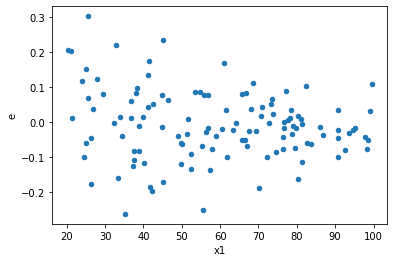

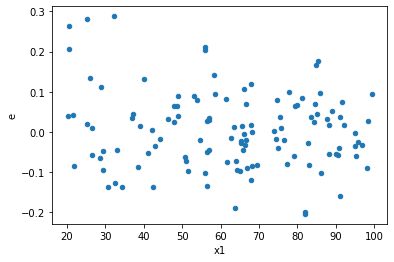

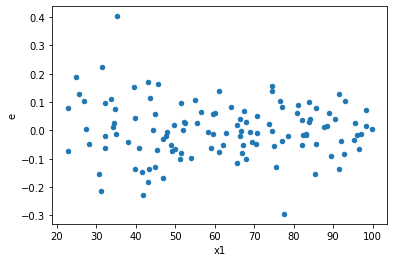

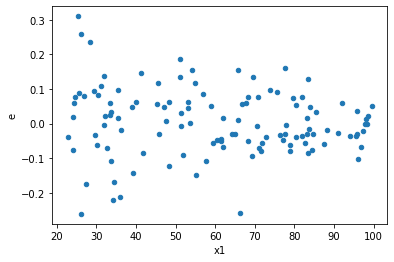

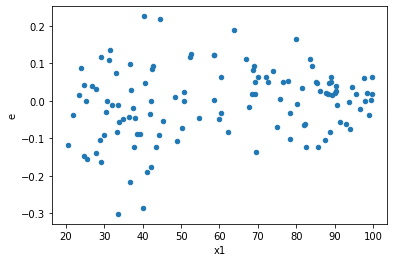

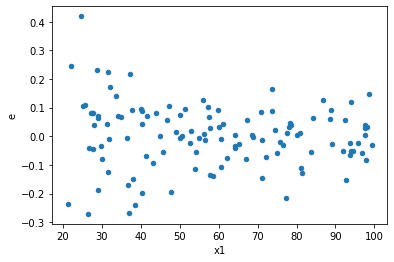

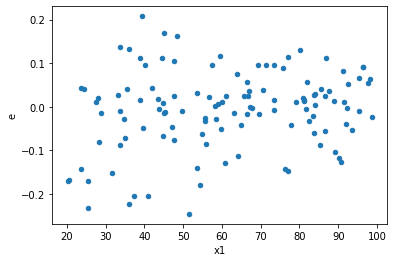

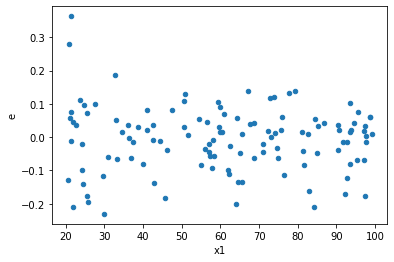

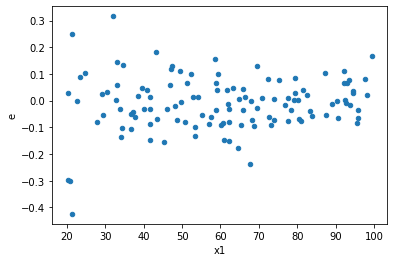

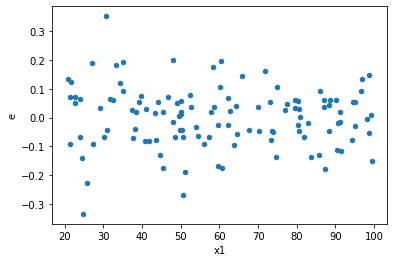

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,0.5567243157259998,0.18753061273769295,0.011845198206936166,0.003990013036972191,0.33684645602939495,0.00028928971083406926,Reject005=0 : Heteroscedasticity
1.0,47.0,47.0,0.7361541958912949,0.2291710624268416,0.01566285523172968,0.0048759800516349275,0.3113085053456415,0.00010682800302539539,Reject005=0 : Heteroscedasticity
2.0,47.0,47.0,0.6239756432083245,0.20625305590185525,0.013276077515070735,0.004388362891528835,0.330546645765457,0.00022893138601865046,Reject005=0 : Heteroscedasticity
3.0,47.0,47.0,0.7736516583200052,0.29302988317678624,0.016460673581276706,0.0062346783654635375,0.37876204364778915,0.0011588941680658064,Reject005=0 : Heteroscedasticity
4.0,47.0,47.0,0.717789676510123,0.17775571023396608,0.015272120776811128,0.0037820363879567252,0.2476431690940587,4.528582355224613e-06,Reject005=0 : Heteroscedasticity
5.0,47.0,47.0,0.7131473253995888,0.34488978765425526,0.015173347348927422,0.0073380805883884095,0.483616463766456,0.014259118412060436,Reject005=0 : Heteroscedasticity
6.0,47.0,47.0,0.6746399404588898,0.17188310393868583,0.014354041286359356,0.0036570873178443796,0.2547775392926945,6.845549188614833e-06,Reject005=0 : Heteroscedasticity
7.0,47.0,47.0,0.5465610031209502,0.24080709162129707,0.011628957513211708,0.005123555140878661,0.4405859368785008,0.0058296424715098836,Reject005=0 : Heteroscedasticity
8.0,47.0,47.0,0.4784332502709243,0.17991236534504604,0.010179430856828178,0.0038279226669158733,0.3760448615207374,0.0010677972107615951,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    941
Reject005=1 : Homoscedasticity       59
Name: Result_test, dtype: int64